### Predictive analysis of Falcon 9 landing


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  requests
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

### Plot the confusion matrix

In [8]:
def plot_confusion_matrix(y,y_predict):
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y.y_predict)
    ax=plt.subplot()
    sns.heatmap(cm,annot=true, ax=ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show()


###  loading data 

In [13]:
def download (URL,filename):
    response=requests.get(URL1)
    if response.status_code==200:
        with open (filename,"wb") as f:
            f.write(response.content)
            return True
            
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
filename="dataset_part_2.csv"
download(URL1,"dataset_part_2.csv")
df=pd.read_csv(filename)
df=pd.read_csv(filename,header=0)
df.head(100)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1


### Create a NumPy array from the column Class in data

In [22]:
X = df.drop(columns=[
    'Date',             # string
    'BoosterVersion',   # string
    'Orbit',            # string
    'LaunchSite',       # string
    'Outcome',          # string
    'LandingPad',       # NaNs + string
    'Serial',           # string
    'Class'             # target column
])
X = X.fillna(0)
Y= df['Class'].to_numpy()

In [25]:
#create the standardization object
transform=preprocessing.StandardScaler()
#fit the transformer on X and transform X
X=transform.fit_transform(X)
#split into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2, random_state=4)
#Split training set into training + validation inside GridSearchCV
#define the model
model= SVC()
#define hyperparameter grid
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Grid search with cross-validation (e.g., 5-fold)
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
best_model.score(X_test, y_test)


0.7222222222222222

### Create the vector Machine

In [29]:
# Define the SVM model
svm = SVC()

# Define the hyperparameter grid
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

# Create GridSearchCV object with 10-fold cross-validation
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit the model on training data
svm_cv.fit(X_train, y_train)

# Output best parameters and best score
print("Tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("Accuracy (best CV score):", svm_cv.best_score_)

Tuned hyperparameters (best parameters): {'C': np.float64(0.001), 'gamma': np.float64(1.0), 'kernel': 'poly'}
Accuracy (best CV score): 0.8910714285714286


In [30]:
# Evaluate accuracy on test data
accuracy = svm_cv.best_estimator_.score(X_test, y_test)
print("Accuracy on test data:", accuracy)


Accuracy on test data: 0.7222222222222222


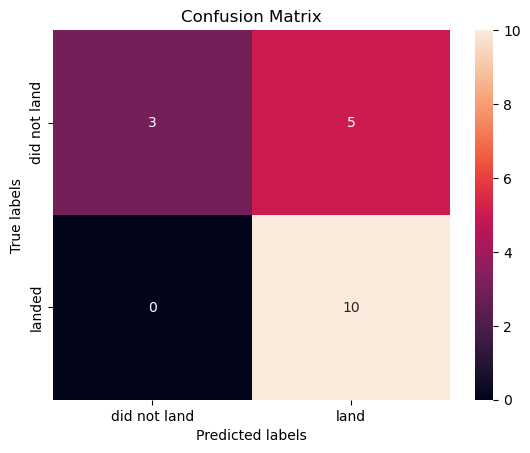

In [35]:
def plot_confusion_matrix(y,y_predict):
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y,y_predict)
    ax=plt.subplot()
    sns.heatmap(cm,annot=True, ax=ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show()
yhat = svm_cv.predict(X_test)
plot_confusion_matrix(y_test, yhat)


In [39]:
### Create decision tree 
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1, 10)],
    'max_features': ['sqrt', None],  # remove 'auto' here!
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Create Decision Tree classifier
tree = DecisionTreeClassifier(random_state=1)

# Create GridSearchCV object with 10-fold cross-validation
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10)

# Fit the model on the training data
tree_cv.fit(X_train, y_train)

# Output the best parameters and score
print("Tuned hyperparameters (best parameters):", tree_cv.best_params_)
print("Accuracy:", tree_cv.best_score_)

Tuned hyperparameters (best parameters): {'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
Accuracy: 0.8875


### Tune KNN model using grid search

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # p=1 (Manhattan), p=2 (Euclidean)
}

# Initialize KNN classifier
KNN = KNeighborsClassifier()

# Perform Grid Search with 10-fold cross-validation
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, y_train)

# Output best parameters and cross-validated accuracy
print("Tuned hyperparameters (best parameters):", knn_cv.best_params_)
print("Accuracy:", knn_cv.best_score_)


Tuned hyperparameters (best parameters): {'algorithm': 'auto', 'n_neighbors': 3, 'p': 2}
Accuracy: 0.9035714285714287


### Accuracy on Test Data + Confusion Matrix

Test accuracy: 0.7777777777777778


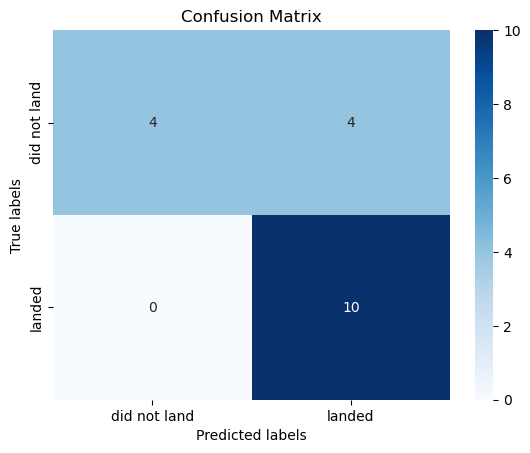

In [41]:
# Calculate accuracy on test set
knn_test_accuracy = knn_cv.score(X_test, y_test)
print("Test accuracy:", knn_test_accuracy)

# Predict labels
yhat = knn_cv.predict(X_test)

# Plot confusion matrix (make sure function is fixed)
def plot_confusion_matrix(y, y_predict):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'landed'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

# Plot
plot_confusion_matrix(y_test, yhat)
